### Importing the required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm



###  Downloading and loading the Heart Disease Dataset from kaggle


In [2]:
mydf = pd.read_csv("heart.csv")
mydf.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Splitting my data into training and testing sets


In [3]:
X = mydf.drop(columns=['target'])
y = mydf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree Classifier

In [4]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Classifier Accuracy: {dt_acc:.3f}")

Decision Tree Classifier Accuracy: 0.985


### Random Forest Classifier

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.9853658536585366


### Plotting the accuracy

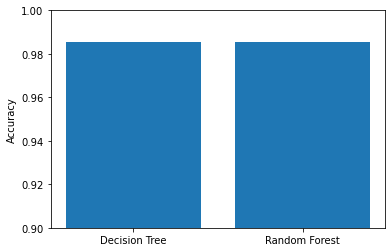

In [6]:
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_acc, rf_accuracy]
plt.bar(models, accuracies)
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.show()

In [7]:
### Deep Neural Network (DNN) model

In [8]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score


### Splitting data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    mydf.drop(columns=['target']), mydf['target'], test_size=0.2, random_state=42)


### Defining the DNN model

In [10]:
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)   
        self.fc2 = nn.Linear(128, 64)           
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

model = DNN(X_train.shape[1])

# loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training the model

In [11]:
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train.values, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1))
    loss.backward()
    optimizer.step()


### Evaluating the model on the test set and printing the scores


In [12]:
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32))
    y_pred = (y_pred > 0.5).float()
    acc_dnn = accuracy_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
        
print("Accuracy:", acc_dnn)
print("F2 score:", f2)

Accuracy: 0.6780487804878049
F2 score: 0.7074569789674953


In [13]:
### Plotting the scores for each model

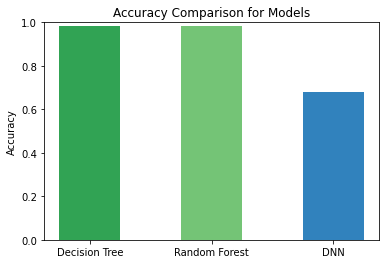

In [14]:


dt_acc = dt_acc
rf_acc = rf_accuracy
dnn_acc = acc_dnn

labels = ['Decision Tree', 'Random Forest', 'DNN']
colors = ['red', 'baby_blue', 'green']
accuracy_scores = [dt_acc, rf_acc, acc_dnn]
x = range(len(accuracy_scores))

#colors = cm.viridis([0.1, 0.5, 0.9])

import matplotlib.colors as colors
my_colors = ['#31a354','#74c476', '#3182bd']

my_cmap = colors.ListedColormap(my_colors)

colors = my_cmap([0, 1, 2])


plt.bar(x, accuracy_scores, color=colors, width=0.5)
plt.xticks(x, labels)
plt.title('Accuracy Comparison for Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()


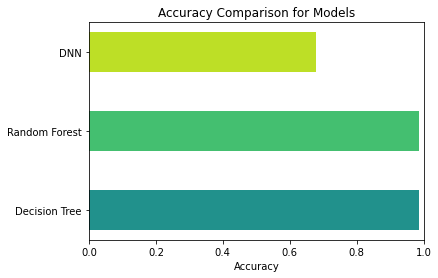

In [15]:
import matplotlib.pyplot as plt

dt_acc = dt_acc
rf_acc = rf_accuracy
dnn_acc = acc_dnn

labels = ['Decision Tree', 'Random Forest', 'DNN']

colors = cm.viridis([0.5, 0.7, 0.9])

accuracy_scores = [dt_acc, rf_acc, dnn_acc]

plt.barh(labels, accuracy_scores, color=colors,height=0.5)
plt.title('Accuracy Comparison for Models')
plt.xlabel('Accuracy')
plt.xlim(0, 1.0)
plt.show()
